In [ ]:
!pip install geopandas fiona shapely pygeos pyproj

In [ ]:
# !pip uninstall rtree
# sudo apt install libspatialindex-dev
!pip install rtree

In [ ]:
DIR = "/content/drive/MyDrive/College (Master)/Semester 1/COMP90024 - Cluster and Cloud Computing/Assignment/CCC Assignment 2 - 2022/Data Exploration"

In [ ]:
import fiona
import shapely
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
LOCATIONS = {}
LOCATIONS["west"] = [144.317, -38.012, 144.856, -37.166]
LOCATIONS["north"] = [144.856, -38.012, 145.107, -37.166]
LOCATIONS["east"] = [145.115, -37.997, 145.490, -37.423]
LOCATIONS["south"] = [144.629, -38.533, 145.546, -38.012]

# Read Data

In [ ]:
solar = pd.read_csv(DIR + '/abs_data_by_region_land_and_environment_asgs_sa3_2014_2018-1671217258573326666.csv')
motor_vehicle = pd.read_csv(DIR + '/sa3_g30_number_motor_vehicles_by_dwelling_census_2016-1764967437638415648.csv')

sa3_code_solar = list(solar[" sa3_code_2016"])
sa3_code_mh = list(motor_vehicle[" sa3_code16"])
sa3_code = sa3_code_solar + sa3_code_mh

print(sa3_code)
motor_vehicle

[20102, 20202, 20302, 20303, 20401, 20503, 20601, 20602, 20603, 20604, 20605, 20702, 20703, 20801, 20803, 20804, 20901, 20902, 20903, 20904, 21001, 21002, 21003, 21004, 21005, 20606, 20607, 20701, 21101, 21102, 21103, 20802, 21104, 21105, 21201, 21202, 21203, 21204, 21205, 21301, 21302, 21303, 21304, 21305, 21401, 21402, 20102, 20202, 20302, 20303, 20401, 20503, 20601, 20602, 20603, 20604, 20605, 21004, 21005, 21101, 21102, 21103, 21104, 21105, 21201, 21202, 21203, 21204, 21205, 21301, 21302, 21303, 21304, 21305, 21401, 21402, 20606, 20607, 20701, 20702, 20703, 20801, 20902, 20903, 20904, 21001, 21002, 20802, 20803, 20804, 20901, 21003]


,num_mvs_ns,num_mvs_per_dweling_2_mvs,num_mvs_per_dweling_1_mvs,sa3_code16,num_mvs_per_dweling_3_mvs,total_dwelings,sa3_name16,num_mvs_per_dweling_tot,num_mvs_per_dweling_0_mvs,num_mvs_per_dweling_4mo_mvs
0,516,3910,2879,20102,1728,10591,Creswick - Daylesford - Ballan,10079,313,1250
1,719,6699,5240,20202,2603,17580,Heathcote - Castlemaine - Kyneton,16858,671,1643
2,2612,26053,25145,20302,7670,70291,Geelong,67683,4964,3851
3,802,11522,8203,20303,3256,26043,Surf Coast - Bellarine Peninsula,25240,704,1556
4,1043,7221,6225,20401,2894,20110,Upper Goulburn Valley,19066,820,1908
5,1037,8900,8441,20503,2969,24037,Gippsland - South West,22998,1113,1573
6,1022,8723,15804,20601,2040,34058,Brunswick - Coburg,33037,5615,855
7,598,5907,9347,20602,1182,20277,Darebin - South,19688,2783,466
8,900,7697,10761,20603,1983,25578,Essendon,24681,3358,887
9,2125,6100,21110,20604,902,57012,Melbourne City,54891,26465,314


In [ ]:
# List down all layers
for layername in fiona.listlayers(DIR + '/asgs2016.gpkg'):
    print("===============%s==============" % (layername))
    geopkg = gpd.read_file(DIR + '/asgs2016.gpkg', layer=layername)
    i = 0
    for name in geopkg.columns:
        print(name)
        i += 1

===============australia_2016==============
AUS_CODE_2016
AUS_NAME_2016
geometry
===============greater_capital_city_statistical_area_2016==============
GCCSA_CODE_2016
GCCSA_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============state_2016==============
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_1_2016==============
SA1_MAINCODE_2016
SA1_7DIGITCODE_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_2_2016==============
SA2_MAINCODE_2016
SA2_5DIGITCODE_2016
SA2_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_3_2016==============
SA3_CODE_2016
SA3_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============statistical_area_level_4_2016==============
SA4_CODE_2016
SA4_NAME_2016
STE_CODE_2016
STE_NAME_2016
geometry
===============mesh_block_2016==============
MB_CODE_2016
ADD_CODE_2016
ADD_NAME_2016
AUS_CODE_2016
AUS_NAME_2016
CED_CODE_2016
CED_NAME_2016
DZN_CODE_2016
DZN_NAME_2016
G

In [ ]:
geopkg = gpd.read_file(DIR + '/asgs2016.gpkg', layer="statistical_area_level_3_2016")
geopkg.columns

Index(['SA3_CODE_2016', 'SA3_NAME_2016', 'STE_CODE_2016', 'STE_NAME_2016',
       'geometry'],
      dtype='object')

In [ ]:
geopkg

,SA3_CODE_2016,SA3_NAME_2016,STE_CODE_2016,STE_NAME_2016,geometry
0,90102,Cocos (Keeling) Islands,9,Other Territories,"MULTIPOLYGON (((96.81703 -12.14427, 96.81703 -..."
1,90101,Christmas Island,9,Other Territories,"MULTIPOLYGON (((105.67392 -10.41567, 105.67381..."
2,50101,Augusta - Margaret River - Busselton,5,Western Australia,"MULTIPOLYGON (((115.35176 -33.64196, 115.35147..."
3,50103,Manjimup,5,Western Australia,"MULTIPOLYGON (((115.50734 -34.01742, 115.50734..."
4,50102,Bunbury,5,Western Australia,"MULTIPOLYGON (((116.20889 -33.03037, 116.20880..."
...,...,...,...,...,...
353,79999,No usual address (NT),7,Northern Territory,None
354,89797,Migratory - Offshore - Shipping (ACT),8,Australian Capital Territory,None
355,89999,No usual address (ACT),8,Australian Capital Territory,None
356,99797,Migratory - Offshore - Shipping (OT),9,Other Territories,None


In [ ]:
geopkg["SA3_CODE_2016"][0]

'90102'

In [ ]:
sa3_code[0]

20102

In [ ]:
geometry_list = {}

for code in sa3_code:
    # print(geopkg[geopkg.SA3_CODE_2016 == str(code)]["geometry"].values)
    geometry_list[str(code)] = geopkg[geopkg.SA3_CODE_2016 == str(code)]["geometry"].values

In [ ]:
geometry_list

{'20102': <GeometryArray>
 Length: 1, dtype: geometry, '20202': <GeometryArray>
 Length: 1, dtype: geometry, '20302': <GeometryArray>
 Length: 1, dtype: geometry, '20303': <GeometryArray>
 Length: 1, dtype: geometry, '20401': <GeometryArray>
 Length: 1, dtype: geometry, '20503': <GeometryArray>
 Length: 1, dtype: geometry, '20601': <GeometryArray>
 Length: 1, dtype: geometry, '20602': <GeometryArray>
 Length: 1, dtype: geometry, '20603': <GeometryArray>
 Length: 1, dtype: geometry, '20604': <GeometryArray>
 Length: 1, dtype: geometry, '20605': <GeometryArray>
 Length: 1, dtype: geometry, '20606': <GeometryArray>
 Length: 1, dtype: geometry, '20607': <GeometryArray>
 Length: 1, dtype: geometry, '20701': <GeometryArray>
 Length: 1, dtype: geometry, '20702': <GeometryArray>
 Length: 1, dtype: geometry, '20703': <GeometryArray>
 Length: 1, dtype: geometry, '20801': <GeometryArray>
 Length: 1, dtype: geometry, '20802': <GeometryArray>
 Length: 1, dtype: geometry, '20803': <GeometryArray>
 L

# Classify each code to directions

## Generate points in bounding boxes

In [ ]:
from shapely.geometry import Polygon, LineString, Point

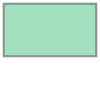

In [ ]:
new_directions = {}

for direction, coord in LOCATIONS.items():
    lon1 = coord[0]
    lat1 = coord[1]

    lon2 = coord[2]
    lat2 = coord[3]

    points = []
    points.append((lon1, lat1))
    points.append((lon2, lat1))
    points.append((lon2, lat2))
    points.append((lon1, lat2))
    polygons = Polygon(points)
    new_directions[direction] = polygons

new_directions['south']

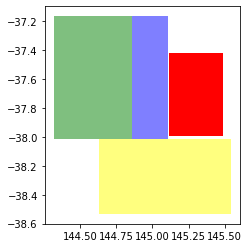

In [ ]:
polys1 = gpd.GeoSeries(new_directions['east'])
polys2 = gpd.GeoSeries(new_directions['west'])
polys3 = gpd.GeoSeries(new_directions['north'])
polys4 = gpd.GeoSeries(new_directions['south'])

df1 = gpd.GeoDataFrame({'geometry': polys1})
df2 = gpd.GeoDataFrame({'geometry': polys2})
df3 = gpd.GeoDataFrame({'geometry': polys3})
df4 = gpd.GeoDataFrame({'geometry': polys4})

ax = df1.plot(color='red')
df2.plot(ax=ax, color='green', alpha=0.5)
df3.plot(ax=ax, color='blue', alpha=0.5)
df4.plot(ax=ax, color='yellow', alpha=0.5)

In [ ]:
df_locations = \
{
    'east': df1,
    'west': df2,
    'north': df3,
    'south': df4
}

## Check intersection

Area of intersection with west 0.009491047437427957
Area of intersection with north 0    0.020521
dtype: float64


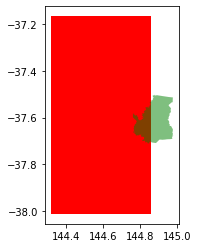

In [ ]:
val = geometry_list['21005']
polys_df = gpd.GeoDataFrame({'geometry': val})

intersect_west = polys_df.overlay(df2, how='intersection')
intersect_north = polys_df.overlay(df3, how='intersection')

print("Area of intersection with west", intersect_west.area.values[0])
print("Area of intersection with north", intersect_north.area)

ax = df2.plot(color='red')
polys_df.plot(ax=ax, color='green', alpha=0.5)

In [ ]:
val = geometry_list['21005']
polys_df = gpd.GeoDataFrame({'geometry': val})

intersect_west = polys_df.overlay(df2, how='intersection')
intersect_west

,geometry
0,"MULTIPOLYGON (((144.85447 -37.70273, 144.85195..."


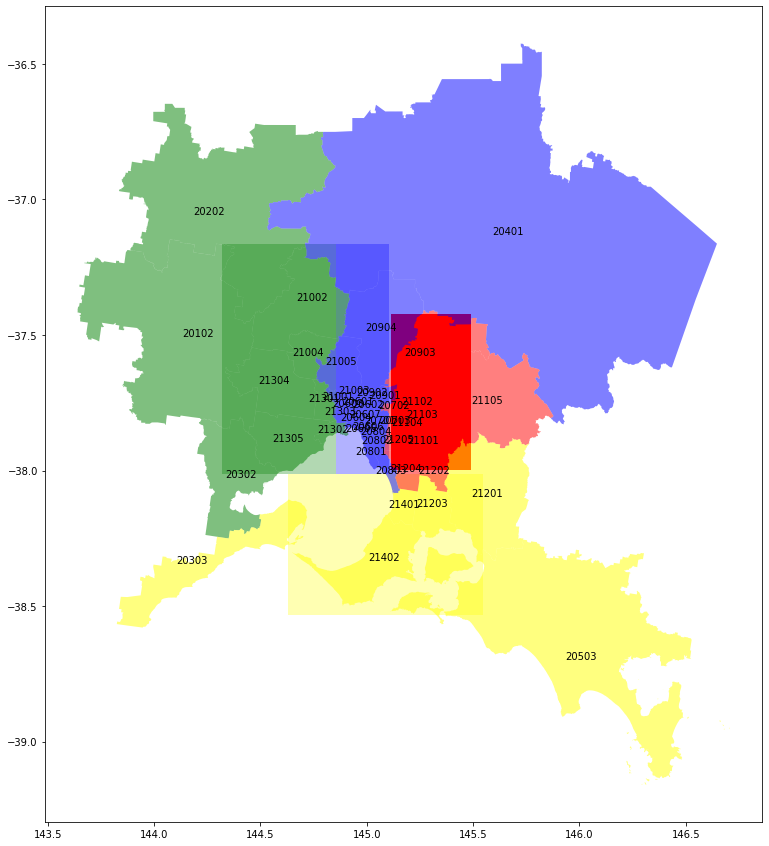

In [ ]:
areas_classification = {'west': [], 'east': [], 'north': [], 'south': []}
color_classification = {'west': "green", 'east': "red", 'north': "blue", 'south': "yellow"}
classified = []

ax = df1.plot(color='red', figsize=(15,15))
df2.plot(ax=ax, color='green', alpha=0.3)
df3.plot(ax=ax, color='blue', alpha=0.3)
df4.plot(ax=ax, color='yellow', alpha=0.3)

for key, poly in geometry_list.items():
    max = 0
    max_dir = ""
    for direction, poly_dir in df_locations.items():
        polys_df = gpd.GeoDataFrame({'geometry': poly})
        intersection = polys_df.overlay(poly_dir, how='intersection')
        if intersection.values:
            if intersection.area.values[0] > max:
                max = intersection.area.values[0]
                max_dir = direction

    areas_classification[max_dir].append(key)
    classified.append(key)

    # Plot
    polys_df['coords'] = polys_df['geometry'].apply(lambda x: x.representative_point().coords[:])
    polys_df['coords'] = [coords[0] for coords in polys_df['coords']]
    polys_df.plot(ax=ax, color=color_classification[max_dir], alpha=0.5)

    for idx, row in polys_df.iterrows():
        plt.annotate(s=key, xy=row['coords'],
                    horizontalalignment='center')

In [ ]:
# Embed the classification in dataframe for easy aggregation
motor_vehicle['area_classification'] = "outer"
solar['area_classification'] = "outer"

for direction, code_list in areas_classification.items():
    for code in code_list:
        sa3_code_solar = list(solar[" sa3_code_2016"])
        sa3_code_mh = list(motor_vehicle[" sa3_code16"])

        motor_vehicle.loc[motor_vehicle[' sa3_code16'] == int(code), 'area_classification'] = direction
        solar.loc[solar[' sa3_code_2016'] == int(code), 'area_classification'] = direction

In [ ]:
solar['area_classification'].value_counts()

north    20
east     11
west      9
south     6
Name: area_classification, dtype: int64

In [ ]:
motor_vehicle['area_classification'].value_counts()

north    20
east     11
west      9
south     6
Name: area_classification, dtype: int64

# Analyze AURIN Data

## Basic summarization solar

In [ ]:
solar.head()

,slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm,land_area_land_area_ha,slr_instlltns_accmltve_ttl_2001_incrse_wtr_htr_frm_prvs_yr_pc,yr,solar_installations_accumulative_total_2001_water_heater_num,sa3_name_2016,slr_instlltns_accmltve_ttl_2001_incrse_pnl_frm_prvs_yr_pc,sa3_code_2016,area_classification
0,3476,366667.3,5.2,2018,1761,Creswick - Daylesford - Ballan,15.1,20102,west
1,6573,392093.8,7.1,2018,3597,Heathcote - Castlemaine - Kyneton,13.4,20202,west
2,12848,91889.2,8.1,2018,9884,Geelong,11.3,20302,west
3,7711,92996.9,16.2,2018,7810,Surf Coast - Bellarine Peninsula,15.9,20303,south
4,7167,1395931.8,8.1,2018,3160,Upper Goulburn Valley,13.6,20401,north


In [ ]:
solar.describe()

,slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm,land_area_land_area_ha,slr_instlltns_accmltve_ttl_2001_incrse_wtr_htr_frm_prvs_yr_pc,yr,solar_installations_accumulative_total_2001_water_heater_num,slr_instlltns_accmltve_ttl_2001_incrse_pnl_frm_prvs_yr_pc,sa3_code_2016
count,46.000000,4.600000e+01,46.000000,46.0,46.000000,46.000000,46.000000
mean,6219.543478,8.210852e+04,9.278261,2018.0,4713.934783,13.765217,20887.608696
std,4159.308429,2.221020e+05,4.729149,0.0,5982.997530,2.434221,334.657601
min,763.000000,1.192900e+03,0.300000,2018.0,315.000000,9.800000,20102.000000
25%,2911.000000,3.742200e+03,5.950000,2018.0,1602.750000,12.350000,20606.250000
50%,4736.500000,7.466800e+03,8.100000,2018.0,2462.000000,13.300000,20903.500000
75%,9287.750000,7.111120e+04,12.550000,2018.0,4522.000000,15.175000,21177.000000
max,17543.000000,1.395932e+06,22.800000,2018.0,30709.000000,21.600000,21402.000000


## Basic summarization motor vehicle

In [ ]:
motor_vehicle.head()

,num_mvs_ns,num_mvs_per_dweling_2_mvs,num_mvs_per_dweling_1_mvs,sa3_code16,num_mvs_per_dweling_3_mvs,total_dwelings,sa3_name16,num_mvs_per_dweling_tot,num_mvs_per_dweling_0_mvs,num_mvs_per_dweling_4mo_mvs,area_classification
0,516,3910,2879,20102,1728,10591,Creswick - Daylesford - Ballan,10079,313,1250,west
1,719,6699,5240,20202,2603,17580,Heathcote - Castlemaine - Kyneton,16858,671,1643,west
2,2612,26053,25145,20302,7670,70291,Geelong,67683,4964,3851,west
3,802,11522,8203,20303,3256,26043,Surf Coast - Bellarine Peninsula,25240,704,1556,south
4,1043,7221,6225,20401,2894,20110,Upper Goulburn Valley,19066,820,1908,north


In [ ]:
motor_vehicle.describe()

,num_mvs_ns,num_mvs_per_dweling_2_mvs,num_mvs_per_dweling_1_mvs,sa3_code16,num_mvs_per_dweling_3_mvs,total_dwelings,num_mvs_per_dweling_tot,num_mvs_per_dweling_0_mvs,num_mvs_per_dweling_4mo_mvs
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1237.347826,13923.217391,13105.478261,20887.608696,4229.630435,37894.217391,36657.543478,3172.108696,2226.391304
std,627.070197,7213.301771,6174.931599,334.657601,2473.949253,17158.285954,16588.469867,3989.852224,1387.918065
min,184.000000,3474.000000,1645.000000,20102.000000,902.000000,8262.000000,8077.000000,159.000000,314.000000
25%,891.500000,8093.250000,8466.750000,20606.250000,2040.250000,24422.250000,23418.750000,1224.500000,1206.500000
50%,1078.000000,12248.000000,13313.500000,20903.500000,3611.500000,35795.000000,34698.000000,2344.000000,1803.000000
75%,1560.000000,20420.500000,17674.000000,21177.000000,6583.000000,51305.750000,49783.500000,4201.000000,3509.500000
max,2637.000000,29300.000000,25145.000000,21402.000000,9462.000000,70291.000000,67683.000000,26465.000000,5554.000000


## Analysis per area

In [ ]:
analysis = {}

for dir in ['north', 'south', 'west', 'east']:
    analysis[dir] = {}
    dir_solar = solar[solar.area_classification == dir]
    dir_mv = motor_vehicle[motor_vehicle.area_classification == dir]

    # Solar analysis
    analysis[dir]['solar'] = {}
    analysis[dir]['solar']['sum_solar_installation'] = dir_solar['slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm'].sum()
    analysis[dir]['solar']['avg_solar_installation'] = dir_solar['slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm'].mean()

    dir_solar['perha_solar_installation'] = dir_solar['slr_instlltns_accmltve_ttl_2001_smll_scle_pnl_systm_nm'] / dir_solar[' land_area_land_area_ha']
    analysis[dir]['solar']['sum_perha_solar_installation'] = dir_solar['perha_solar_installation'].sum()
    analysis[dir]['solar']['avg_perha_solar_installation'] = dir_solar['perha_solar_installation'].mean()


    # Motor Vehicle analysis
    analysis[dir]['motor_vehicle'] = {}
    analysis[dir]['motor_vehicle']['sum_dwelings'] = dir_mv[' total_dwelings'].sum()
    analysis[dir]['motor_vehicle']['mean_dwelings'] = dir_mv[' total_dwelings'].mean()

    analysis[dir]['motor_vehicle']['sum_dwelings_with_mv'] = dir_mv[' num_mvs_per_dweling_tot'].sum()
    analysis[dir]['motor_vehicle']['mean_dwelings_with_mv'] = dir_mv[' num_mvs_per_dweling_tot'].mean()

    dir_mv['percentage_dweling_with_mv'] = dir_mv[' num_mvs_per_dweling_tot'] / dir_mv[' total_dwelings']
    analysis[dir]['motor_vehicle']['mean_percentage_dwelings_with_mv'] = dir_mv['percentage_dweling_with_mv'].mean()

In [ ]:
analysis

{'east': {'motor_vehicle': {'mean_dwelings': 38774.36363636364,
   'mean_dwelings_with_mv': 37641.181818181816,
   'mean_percentage_dwelings_with_mv': 0.972360748738507,
   'sum_dwelings': 426518,
   'sum_dwelings_with_mv': 414053},
  'solar': {'avg_perha_solar_installation': 0.6875558826346685,
   'avg_solar_installation': 6336.636363636364,
   'sum_perha_solar_installation': 7.563114708981353,
   'sum_solar_installation': 69703}},
 'north': {'motor_vehicle': {'mean_dwelings': 37492.4,
   'mean_dwelings_with_mv': 36280.6,
   'mean_percentage_dwelings_with_mv': 0.9670510354819705,
   'sum_dwelings': 749848,
   'sum_dwelings_with_mv': 725612},
  'solar': {'avg_perha_solar_installation': 0.8316154525236732,
   'avg_solar_installation': 4089.55,
   'sum_perha_solar_installation': 16.63230905047347,
   'sum_solar_installation': 81791}},
 'south': {'motor_vehicle': {'mean_dwelings': 39816.333333333336,
   'mean_dwelings_with_mv': 38395.333333333336,
   'mean_percentage_dwelings_with_mv': 0.

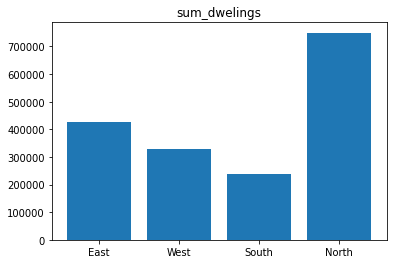

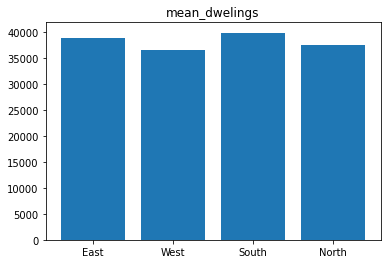

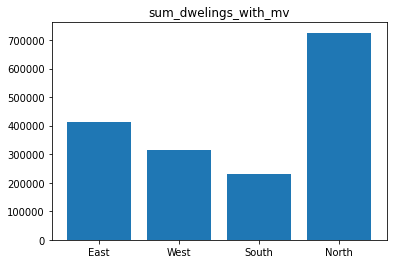

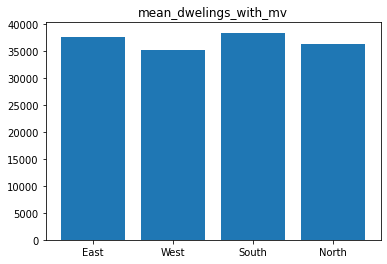

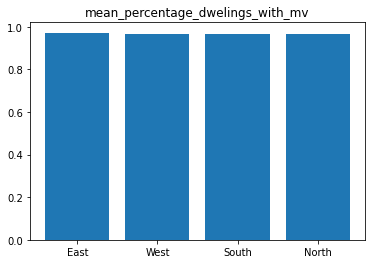

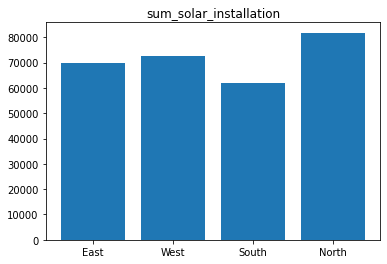

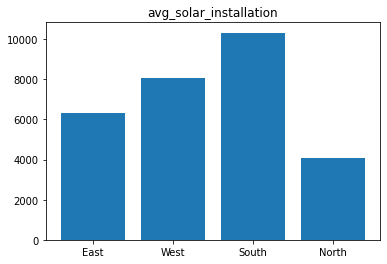

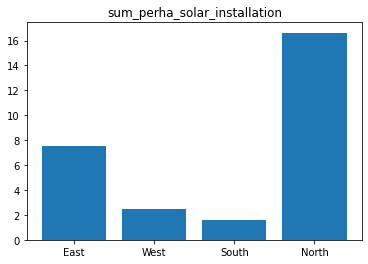

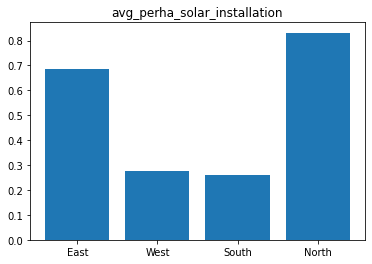

In [ ]:
for type_analysis in ['motor_vehicle', 'solar']:
    for analysis_aspect in analysis['east'][type_analysis].keys():
        x = ['East', 'West', 'South', 'North']
        y = [analysis['east'][type_analysis][analysis_aspect],
             analysis['west'][type_analysis][analysis_aspect],
             analysis['south'][type_analysis][analysis_aspect],
             analysis['north'][type_analysis][analysis_aspect]]

        plt.bar(x, y)
        plt.title(analysis_aspect)
        plt.show()